# Import Libraries

In [1]:
from numpy import isnan
from numpy import mean
from numpy import std
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns

code below is used to change the width of your jupyter display
<br>
<br>
In case you want to revert it back, then you can just cut the cell below

In [2]:
# https://stackoverflow.com/questions/63777194/how-to-increase-jupyter-notebook-lab-cell-widths-when-outputting-to-html
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Install "imbalanced-learn" which we will use to handle imbalance classes problem of this data

In [3]:
! pip install -U imbalanced-learn

You should consider upgrading via the 'C:\Users\Jason Caleb\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Import Dataset

diabetes_012_health_indicators_BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

In [36]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [4]:
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Check type of the data in order to make sure whether the data can be analyze as a number or not
<br>
<br>
From the result, we can see that there is no any data type except float which is numerical

In [5]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# Clean Dataset

For this dataset, mostly we can not do cleaning dataset methods which based on the variety level of the data itself.
The reasons are:
1. Categorical
2. Supervised, which means using target variable 
3. Hard to determine the 0-type null data, as 0 is one of the value needed

So, because of this condition that given from the dataset, we will not do cleaning methods such as "few values" and "low variance", 
instead what we can do for the preparation of the data are removing feature that has single value, removing duplicate row, and imputating all the outliers.

### Cleaning Data - Single Value

But, for cleaning data by single value, from the following result, we can see that in the dataset there is no any single value data, so cleaning by single value is nnot necessary.

In [6]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

### Cleaning Data - Duplicate Row

Next, for cleaning data by removing duplicate row, from the result below, there are about 23899 number of rows that have been successfully deleted or dropped from the data

In [7]:
print(f"Number of rows before droping duplicate data: {df.shape[0]}")

df.drop_duplicates(inplace=True)

print(f"Number of rows after droping duplicate data: {df.shape[0]}")

Number of rows before droping duplicate data: 253680
Number of rows after droping duplicate data: 229781


### Resampling Data

Due to the data has a lot of imbalance classes, so to overcome this we need to do either random over-sampling (which artificially create new data in order to reduce the imbalance level) or random under-sampling (which randomly remove rows of data in order to also reduce the imbalance level)

From the pie-chart below, we can see that the value "0.0" of feature "Diabetes_012" greatly dominates the other value for of the overall amount. Imbalance in data can probably affect the other value inside (which got dominated) to be identified as an outlier which eventually in worst case can bring the data to have a lot of single value. Despite that, imbalance data can also affect the model to be more biased towards the majority class.

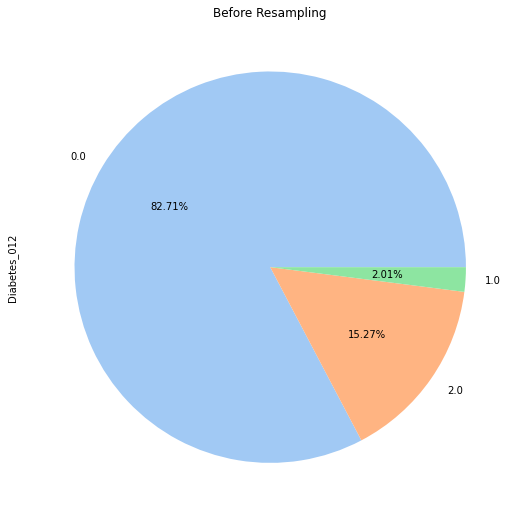

In [8]:
from imblearn.over_sampling import RandomOverSampler

theX = df.iloc[:, 1:]
theY = df.iloc[:, 0]

plt.figure(figsize=(15,9))
ax = theY.value_counts().plot.pie(autopct="%.2f%%", colors=sns.color_palette('pastel'))
_ = ax.set_title("Before Resampling")

Because the majority class has extremely bigger amount of data then the others, so using "over-sampling" for resampling the data is much better than using "under-sampling" which this will cause data shortage

Right now, after resampling the data, we can see that the proportion has been equally spread

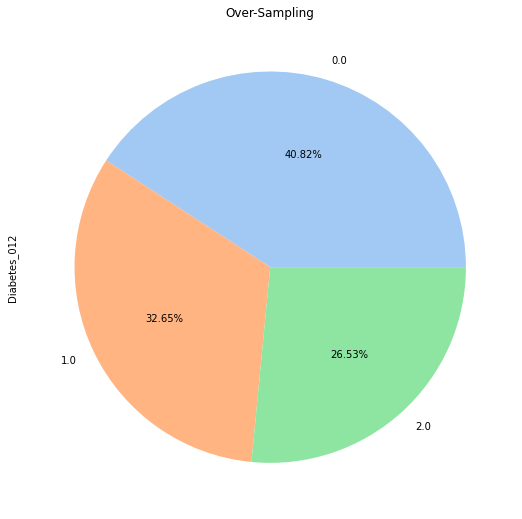

In [9]:
yValueCounts = theY.value_counts()
samplingStrs = {0:yValueCounts[0], 1:int(yValueCounts[0]*0.8), 2:int(yValueCounts[0]*0.65)}
ros = RandomOverSampler(sampling_strategy=samplingStrs, random_state=1)
X_res, y_res = ros.fit_resample(theX, theY)

plt.figure(figsize=(15,9))
ax = y_res.value_counts().plot.pie(autopct="%.2f%%", colors=sns.color_palette('pastel'))
_ = ax.set_title("Over-Sampling")

df = pd.concat([y_res, X_res], axis=1)

But, for the consequence, the number of data is increased, linearly with the differece between majority and minority class

In [10]:
df.shape

(465634, 22)

### Identify Outliers

From the figure shown below, we can see that most of the column data turns out having their outliers

<AxesSubplot:>

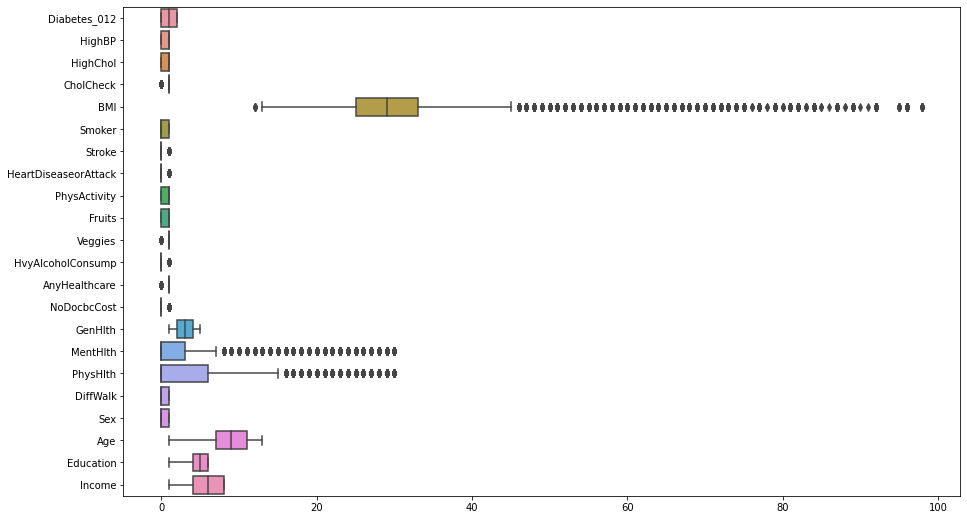

In [11]:
plt.figure(figsize=(15,9))
sns.boxplot(df, orient="h")

### Replace Outliers with NaN

From the following result, we can see that all the previous identified outliers have not been replaced yet with nan

In [12]:
np.isnan(df).sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Using IQR to identify the outliers then replace the value using numpy to get nan value. 
<br>
<br>
This replacement method is not for all the outliers, but only those that has more than 9 number of unique values so then the data is avoided from data shortage

In [13]:
def replaceOutliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    
    cutOff = 1.5*IQR
    lBound = Q1 - cutOff
    uBound = Q3 + cutOff
    
    # find the outliers
    lOutliers = data[col]<lBound
    uOutliers = data[col]>uBound
    
    # check whether there's at least an outlier in data or not
    outlierExist = False
    if lOutliers.sum() > 0 or uOutliers.sum() > 0:
        outlierExist = True
    
    # replaced all the outlier values inside col with nan
    data.loc[lOutliers | uOutliers, col] = np.nan
    
    return data[col], outlierExist



# we need to do this process of finding and replacing the outliers with nan for more than a time
# because if not there'll be still outliers left inside data
iter = 0
isOutlier = True
uniqList = df.nunique()
while isOutlier:
    isOutlier = False
    for col in df.columns:
        if uniqList[col] > 9:
            df[col], isExist = replaceOutliers(df, col)
            if isExist and not isOutlier:
                isOutlier = True
    
    iter += 1
    

    
if iter == 1:
    print(f"All outliers have been successfully replaced for {iter} time")
else:
    print(f"All outliers have been successfully replaced for {iter} times")

All outliers have been successfully replaced for 5 times


Right now, after some of the outliers have been replaced, we can also see from boxplot-chart below that the number of appearing dots are reduced  

<AxesSubplot:>

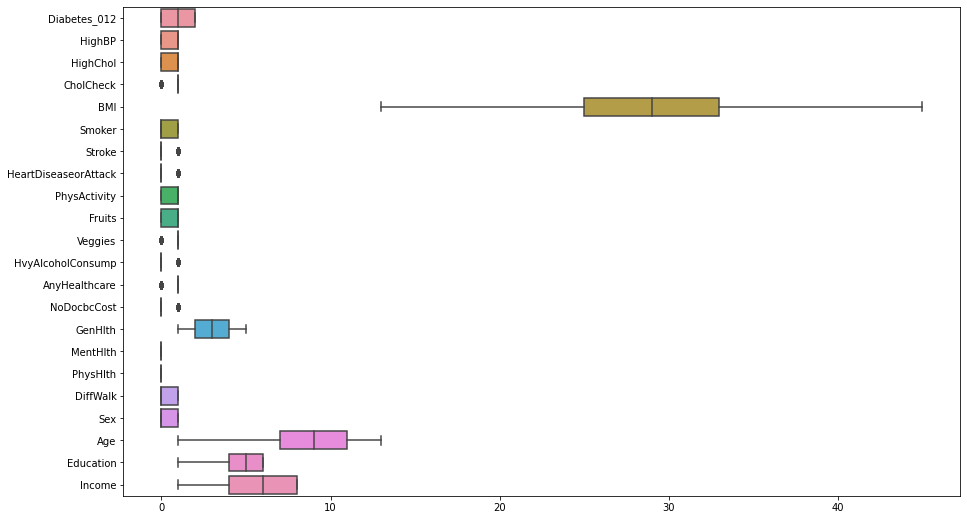

In [14]:
plt.figure(figsize=(15,9))
sns.boxplot(df, orient="h")

Also, from the following result, we can see that the number of nan value is increased

In [15]:
np.isnan(df).sum() 

Diabetes_012                 0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                      13987
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      0
MentHlth                160819
PhysHlth                208615
DiffWalk                     0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

But, eventhough we have limited the to-be-deleted outliers and also resampling the data in order to avoid imbalance class, turns out there are still some of features that ended up having single value. This happen surely because the data turns out to be extremely imbalance than we expected. So, towards this, we have no other choices than to drop or to delete the features.

In [16]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     33
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                 1
PhysHlth                 1
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [17]:
df.drop(["MentHlth", "PhysHlth"], axis=1, inplace=True)
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     33
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [18]:
df.shape

(465634, 20)

# Imputasi Data

After some of the outliers inside data have been successfully replaced with nan, right now, in data imputation, the work is to replace those nan values using data imputation methods. But, because the data is large enough, so we can not afford to use advanced data imputation methods, such as KNN Imputer and KNN Iteratif, instead we can only use SimpleImputer.
<br>
<br>
In SimpleImputer, there are four approaches, which are mean, median, most_frequent, and constant. In the process below, all the approaches are applied in order to see the result and to get the best approach one.

<Figure size 1080x648 with 0 Axes>

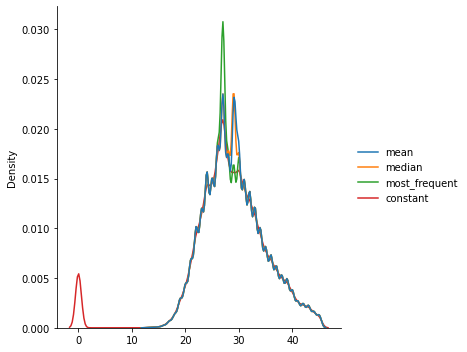

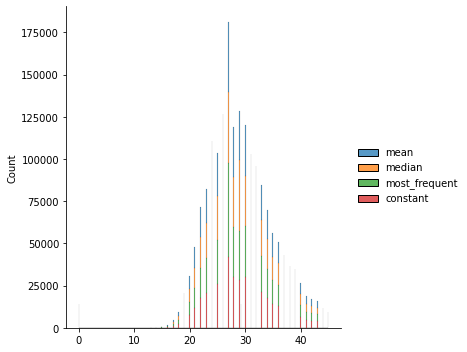

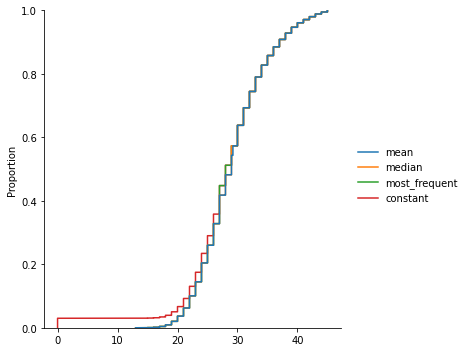

In [19]:
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
dummiesBMI = {}

for s in strategies:
    dummySI = df.copy()
    si = SimpleImputer(missing_values=np.nan, strategy=s)
    dummySI = si.fit_transform(dummySI)
    dummySI = (pd.DataFrame(dummySI, columns=df.columns)).reset_index(drop=True, inplace=False)
    dummiesBMI[s] = dummySI["BMI"]
    
plt.figure(figsize=(15,9))
sns.displot(dummiesBMI, kind="kde")
sns.displot(dummiesBMI, multiple="stack")
sns.displot(dummiesBMI, kind="ecdf")

From the graphs above, we can see that the result turns out to be mostly similar one to another, but only constant that has slightly difference result. But, from the three graphs, we can see that the "blue" is one that has been replaced the nan values with lowest number of changes to the distribution. So, then from the four approaches, we will use "mean" to impute the nan values.
<br>
<br>
Graph below shows the distribution of data before and after doing data imputation

number of missing values before imputation: 13987
number of missing values after imputation: 0


<Figure size 1080x648 with 0 Axes>

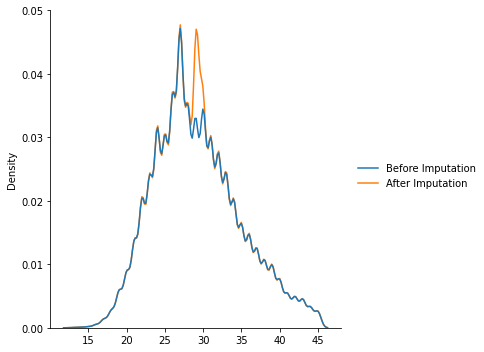

In [20]:
print(f"number of missing values before imputation: {df.isnull().sum().sum()}")

dummySI = df.copy()

siMean  = SimpleImputer(missing_values=np.nan, strategy='mean')
dummySI = siMean.fit_transform(dummySI)
dummySI = (pd.DataFrame(dummySI, columns=df.columns)).reset_index(drop=True, inplace=False)

print(f"number of missing values after imputation: {dummySI.isnull().sum().sum()}")
plt.figure(figsize=(15,9))
sns.displot({"Before Imputation": df["BMI"], "After Imputation": dummySI["BMI"]}, kind="kde")

# Change permanently df
df = dummySI.copy()

# Feature Selection

The following table is the most-updated data of the dataset, which as we can see both rows (increased from 253680 to be 465634) and columns (decreased from 22 to be 20) change due to the data cleaning and resampling method we have just done

In [22]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465629,2.0,1.0,1.0,1.0,21.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,13.0,4.0,5.0
465630,2.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,10.0,6.0,3.0
465631,2.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,11.0,3.0,4.0
465632,2.0,0.0,0.0,1.0,31.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,11.0,6.0,8.0


Right now for the feature selection, we have analyzed the data and is concluded that the dataset from 22 coloumns it has, 2 of them are numerical and the remains are categorical. So, based on that consideration, I decided, we will use three methods of feature selection, which are Mutual Information (able for all data types), Chi-Squared (limited to only data between categoricals), and ANOVA (limited to only data between categorical and numerical). But, despite those, whether the feature selection methods eventually be used or not, are considered from the evaluation value that is raised from an evaluation technique that will be applied to each of them. 


Note:
When we will do the feature selection methods, It tends to change or transform the data value into categorical number data (encoding), but for the dataset we are using, we do not need to do that thing for all the data inside (unless we decide to encode the two numerical data in order to use it in Mutual Information for comparing it with the usual one) because the data itself has already been in encoding.

In [23]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465629,2.0,1.0,1.0,1.0,21.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,13.0,4.0,5.0
465630,2.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,10.0,6.0,3.0
465631,2.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,11.0,3.0,4.0
465632,2.0,0.0,0.0,1.0,31.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,11.0,6.0,8.0


Function to do feature selection

In [24]:
# feature selection
def select_features(X_train, y_train, X_test, order, ntop="all"):
	# configure to select a subset of features
	fs = SelectKBest(score_func=order, k=ntop)
	
    # learn relationship from training data
	fs.fit(X_train, y_train)
	
    # transform train input data
	X_train_fs = fs.transform(X_train)
	
    # transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

### Mutual Information

From the bar-chart shown below, we can see that there are about 12 features that have high enough score, while the others are rather low. The score describes how strength the relationship between the feature and output, which the higher it gets, than the more strength the relationship is built. 

Feature 0: 0.052562
Feature 1: 0.038181
Feature 2: 0.031328
Feature 3: 0.038318
Feature 4: 0.007788
Feature 5: 0.006018
Feature 6: 0.014592
Feature 7: 0.019836
Feature 8: 0.008967
Feature 9: 0.016289
Feature 10: 0.000964
Feature 11: 0.027111
Feature 12: 0.002309
Feature 13: 0.060654
Feature 14: 0.022843
Feature 15: 0.005879
Feature 16: 0.038954
Feature 17: 0.016852
Feature 18: 0.022249


[Text(0.5, 1.0, 'Mutual Information for Features')]

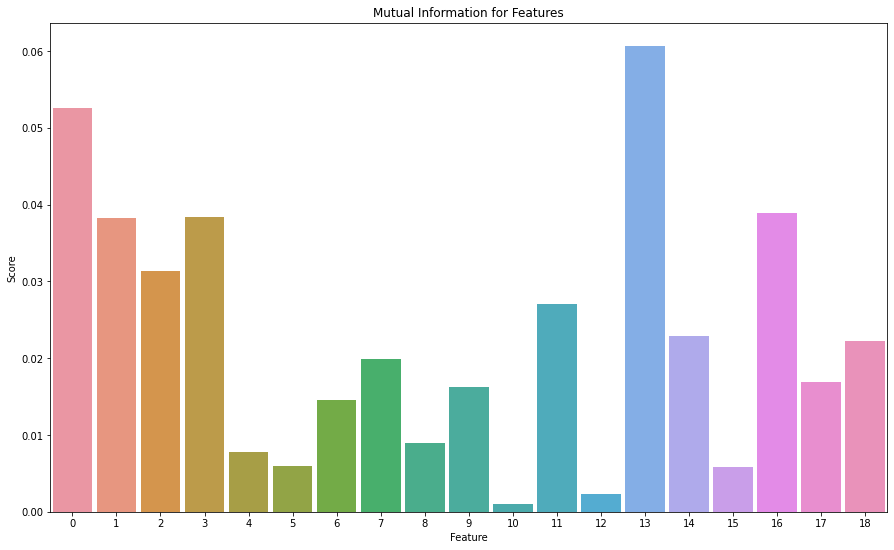

In [25]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=mutual_info_classif)

# Print scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot the scores
plt.figure(figsize=(15,9))
sns.barplot(x=pd.Series([i for i in range(len(fs.scores_))], name="Feature"), y=pd.Series([scr for scr in fs.scores_], name="Score"), width=0.9).set(title='Mutual Information for Features')

### Chi-Squared

Different with what MI have been shown, the bar-chart resulted by Chi-Squared has more low-score-features.

Feature 0: 12151.327724
Feature 1: 8616.260773
Feature 2: 104.919749
Feature 3: 20636.099850
Feature 4: 488.609328
Feature 5: 2957.765216
Feature 6: 7545.756536
Feature 7: 1203.490436
Feature 8: 95.719683
Feature 9: 154.471062
Feature 10: 2079.786552
Feature 11: 13.713344
Feature 12: 861.562560
Feature 13: 12911.665751
Feature 14: 10589.536307
Feature 15: 277.777974
Feature 16: 17214.576405
Feature 17: 1092.688718
Feature 18: 7768.752140


[Text(0.5, 1.0, 'Chi-Squared for Features')]

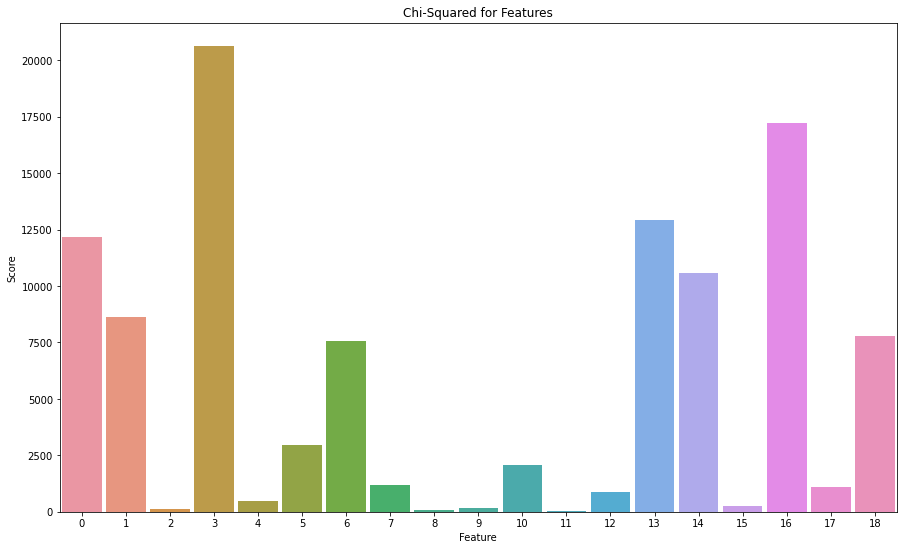

In [26]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=chi2)

# Print scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot the scores
plt.figure(figsize=(15,9))
sns.barplot(x=pd.Series([i for i in range(len(fs.scores_))], name="Feature"), y=pd.Series([scr for scr in fs.scores_], name="Score"), width=0.9).set(title='Chi-Squared for Features')

### ANOVA (Analysis of Variance)

Feature 0: 15385.781555
Feature 1: 9999.437184
Feature 2: 2106.008291
Feature 3: 10368.548842
Feature 4: 475.620359
Feature 5: 1585.937032
Feature 6: 4508.284818
Feature 7: 2002.432422
Feature 8: 120.992591
Feature 9: 352.349372
Feature 10: 1100.738687
Feature 11: 133.273812
Feature 12: 484.182167
Feature 13: 17698.352621
Feature 14: 7400.950243
Feature 15: 251.139102
Feature 16: 9562.715523
Feature 17: 2507.955915
Feature 18: 4719.638972


[Text(0.5, 1.0, 'ANOVA for Features')]

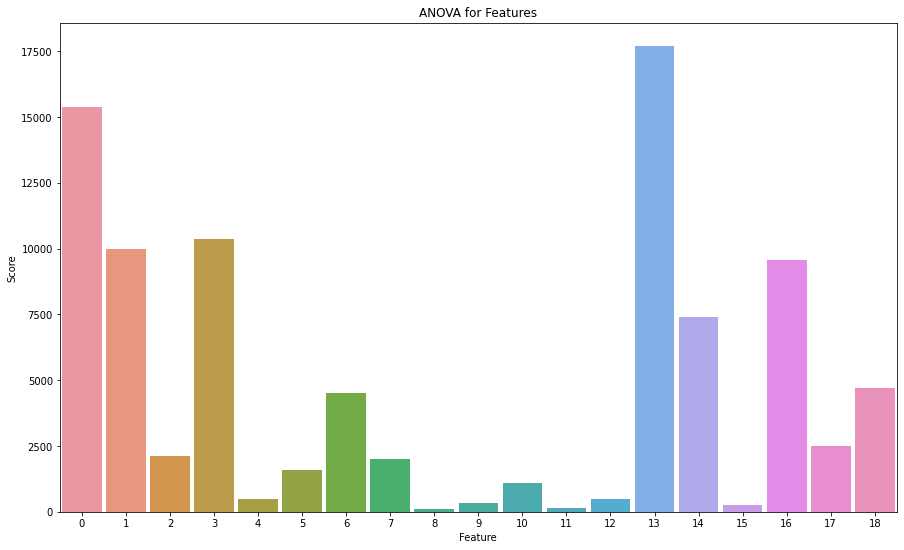

In [27]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=f_classif)

# Print scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot the scores
plt.figure(figsize=(15,9))
sns.barplot(x=pd.Series([i for i in range(len(fs.scores_))], name="Feature"), y=pd.Series([scr for scr in fs.scores_], name="Score"), width=0.9).set(title='ANOVA for Features')

### Evaluation to Categorical-Categorical

#### Initial Accuracy

In [28]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Fit the model
model = LogisticRegression(solver='lbfgs', max_iter=100000)
model.fit(X_train, y_train)

# Evaluate the model
yhat = model.predict(X_test)

# Evaluate predictions
accuracy_categorical_categorical = accuracy_score(y_test, yhat)*100
print('Accuracy: %.2f' % (accuracy_categorical_categorical))

Accuracy: 51.99


#### Mutual Information Accuracy 

Accuracy with 14 features taken: 51.793570219966156
Accuracy with 15 features taken: 51.73239619940128
Accuracy with 16 features taken: 51.90875959911493
Accuracy with 17 features taken: 51.86125211505922
Accuracy with 18 features taken: 51.991409605622806
Accuracy with 19 features taken: 51.985552518547436


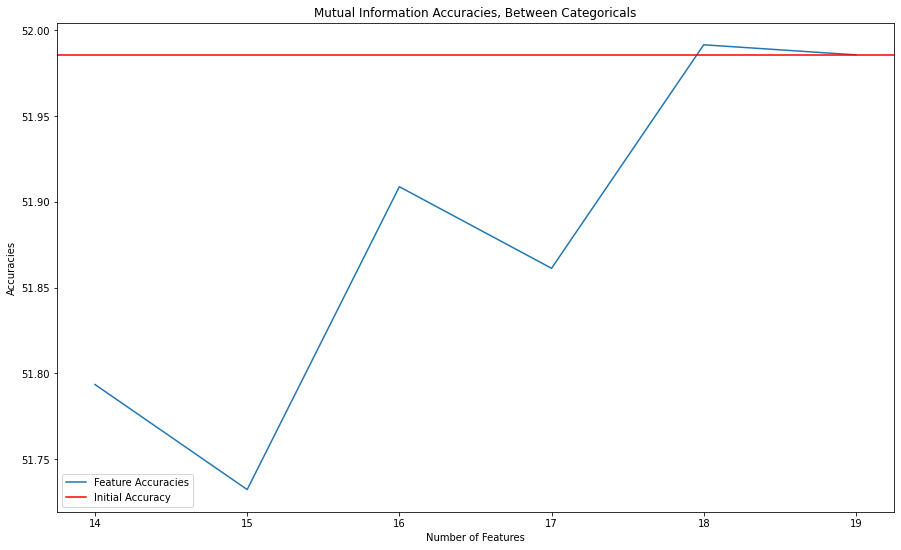

In [29]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
ntops = [14, 15, 16, 17, 18, 19]
accuracies = []
for nt in ntops:
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=mutual_info_classif, ntop=nt)

    # Fit the model
    model = LogisticRegression(solver='lbfgs', max_iter=100000)
    model.fit(X_train_fs, y_train)

    # Evaluate the model
    yhat = model.predict(X_test_fs)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, yhat)*100
    accuracies.append(accuracy)
    print(f'Accuracy with {nt} features taken: {(accuracy)}')
    
# Plot accuracies
plt.figure(figsize=(15,9))
graph = sns.lineplot(x=pd.Series(ntops, name="Number of Features"), y=pd.Series(accuracies, name="Accuracies"), label="Feature Accuracies")
graph.set_title("Mutual Information Accuracies, Between Categoricals")
graph.axhline(accuracy_categorical_categorical, color="r", label="Initial Accuracy")
graph.legend()

#### Chi-Squared Accuracy 

Accuracy with 12 features taken: 51.7005076142132
Accuracy with 13 features taken: 51.80072888194716
Accuracy with 14 features taken: 51.79096707015489
Accuracy with 15 features taken: 51.86125211505922
Accuracy with 16 features taken: 51.84563321619159
Accuracy with 17 features taken: 51.96147338279318
Accuracy with 18 features taken: 51.9224261356241
Accuracy with 19 features taken: 51.985552518547436


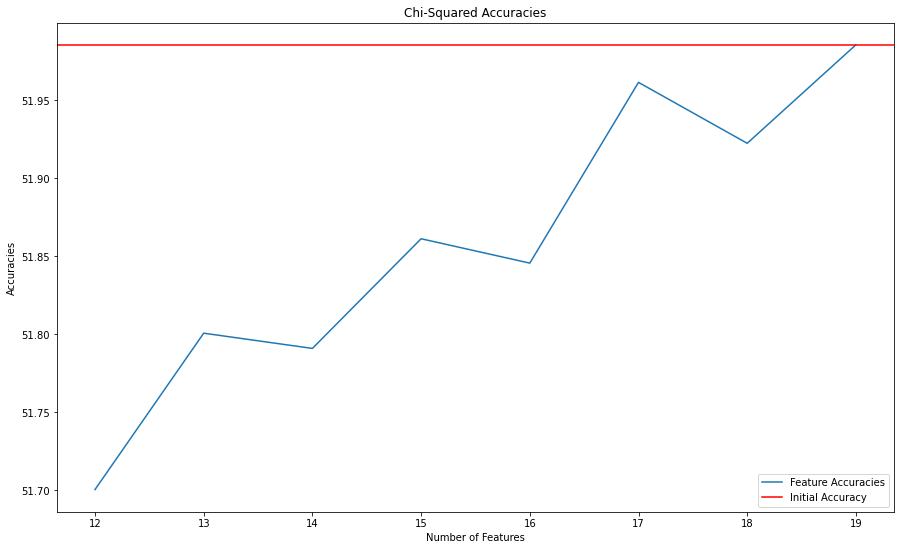

In [35]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
ntops = [12, 13, 14, 15, 16, 17, 18, 19]
accuracies = []
for nt in ntops:
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=chi2, ntop=nt)

    # Fit the model
    model = LogisticRegression(solver='lbfgs', max_iter=100000)
    model.fit(X_train_fs, y_train)

    # Evaluate the model
    yhat = model.predict(X_test_fs)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, yhat)*100
    accuracies.append(accuracy)
    print(f'Accuracy with {nt} features taken: {(accuracy)}')
    
# Plot accuracies
plt.figure(figsize=(15,9))
graph = sns.lineplot(x=pd.Series(ntops, name="Number of Features"), y=pd.Series(accuracies, name="Accuracies"), label="Feature Accuracies")
graph.set_title("Chi-Squared Accuracies")
graph.axhline(accuracy_categorical_categorical, color="r", label="Initial Accuracy")
graph.legend()

### Evaluation to Categorical-Numerical

#### Initial Accuracy

In [31]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Fit the model
model = LogisticRegression(solver='liblinear', max_iter=100000)
model.fit(X_train, y_train)

# Evaluate the model
yhat = model.predict(X_test)

# Evaluate predictions
accuracy_categorical_numerical = accuracy_score(y_test, yhat)*100
print('Accuracy: %.2f' % (accuracy_categorical_numerical))

Accuracy: 51.77


#### Mutual Information Accuracy 

Accuracy with 14 features taken: 51.535207601197456
Accuracy with 15 features taken: 51.52414421449954
Accuracy with 16 features taken: 51.54041390081999
Accuracy with 17 features taken: 51.69269816477938
Accuracy with 18 features taken: 51.61785760770532
Accuracy with 19 features taken: 51.772745021475984


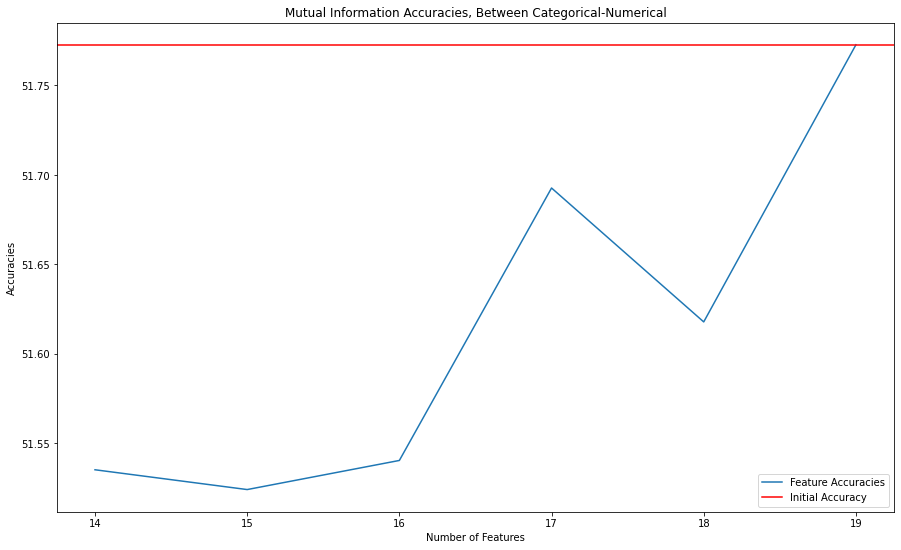

In [32]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
ntops = [14, 15, 16, 17, 18, 19]
accuracies = []
for nt in ntops:
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=mutual_info_classif, ntop=nt)

    # Fit the model
    model = LogisticRegression(solver='liblinear', max_iter=100000)
    model.fit(X_train_fs, y_train)

    # Evaluate the model
    yhat = model.predict(X_test_fs)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, yhat)*100
    accuracies.append(accuracy)
    print(f'Accuracy with {nt} features taken: {(accuracy)}')
    
# Plot accuracies
plt.figure(figsize=(15,9))
graph = sns.lineplot(x=pd.Series(ntops, name="Number of Features"), y=pd.Series(accuracies, name="Accuracies"), label="Feature Accuracies")
graph.set_title("Mutual Information Accuracies, Between Categorical-Numerical")
graph.axhline(accuracy_categorical_numerical, color="r", label="Initial Accuracy")
graph.legend()

#### ANOVA Accuracy 

Accuracy with 12 features taken: 51.32890797865417
Accuracy with 13 features taken: 51.61265130808278
Accuracy with 14 features taken: 51.66731745411949
Accuracy with 15 features taken: 51.72784068723155
Accuracy with 16 features taken: 51.744110373552
Accuracy with 17 features taken: 51.746713523363276
Accuracy with 18 features taken: 51.753221397891444
Accuracy with 19 features taken: 51.772745021475984


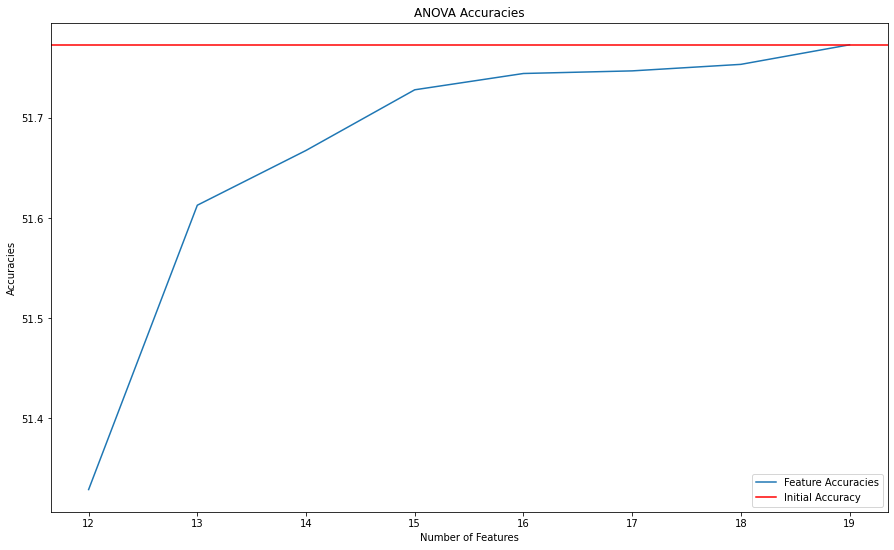

In [33]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
ntops = [12, 13, 14, 15, 16, 17, 18, 19]
accuracies = []
for nt in ntops:
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=f_classif, ntop=nt)

    # Fit the model
    model = LogisticRegression(solver='liblinear', max_iter=100000)
    model.fit(X_train_fs, y_train)

    # Evaluate the model
    yhat = model.predict(X_test_fs)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, yhat)*100
    accuracies.append(accuracy)
    print(f'Accuracy with {nt} features taken: {(accuracy)}')
    
# Plot accuracies
plt.figure(figsize=(15,9))
graph = sns.lineplot(x=pd.Series(ntops, name="Number of Features"), y=pd.Series(accuracies, name="Accuracies"), label="Feature Accuracies")
graph.set_title("ANOVA Accuracies")
graph.axhline(accuracy_categorical_numerical, color="r", label="Initial Accuracy")
graph.legend()

#### Final Feature Selection 

After seeing the evaluation results, I decided to use ANOVA for the feature selection because It is the only one that has fewest number of features, yet still has high enough accuracy compared to the initial value 

In [129]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]
XColumns = X.columns

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# ANOVA with 15 features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=f_classif, ntop=15)

# get top 15 column names
theDict = {}
for i in range(len(fs.scores_)):
    theDict[fs.scores_[i]] = i
sortedValues = sorted(theDict.keys(), reverse=True)
top15columns = [XColumns[theDict[sortedValues[i]]] for i in range(15)]

# Manage new df with top 15 columns
df = df[top15columns]
df = pd.concat([y, df], axis=1)

In [138]:
df

,Diabetes_012,GenHlth,HighBP,BMI,HighChol,Age,DiffWalk,Income,HeartDiseaseorAttack,Education,CholCheck,PhysActivity,Stroke,HvyAlcoholConsump,NoDocbcCost,Smoker
0,0.0,5.0,1.0,40.0,1.0,9.0,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,3.0,0.0,25.0,0.0,7.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,5.0,1.0,28.0,1.0,9.0,1.0,8.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,2.0,1.0,27.0,0.0,11.0,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2.0,1.0,24.0,1.0,11.0,0.0,4.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465629,2.0,3.0,1.0,21.0,1.0,13.0,0.0,5.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0
465630,2.0,4.0,1.0,29.0,1.0,10.0,1.0,3.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0
465631,2.0,4.0,1.0,29.0,1.0,11.0,1.0,4.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0
465632,2.0,3.0,0.0,31.0,0.0,11.0,1.0,8.0,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0


# Analysis and Interpret Data

In [139]:
df

,Diabetes_012,GenHlth,HighBP,BMI,HighChol,Age,DiffWalk,Income,HeartDiseaseorAttack,Education,CholCheck,PhysActivity,Stroke,HvyAlcoholConsump,NoDocbcCost,Smoker
0,0.0,5.0,1.0,40.0,1.0,9.0,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,3.0,0.0,25.0,0.0,7.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,5.0,1.0,28.0,1.0,9.0,1.0,8.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,2.0,1.0,27.0,0.0,11.0,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2.0,1.0,24.0,1.0,11.0,0.0,4.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465629,2.0,3.0,1.0,21.0,1.0,13.0,0.0,5.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0
465630,2.0,4.0,1.0,29.0,1.0,10.0,1.0,3.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0
465631,2.0,4.0,1.0,29.0,1.0,11.0,1.0,4.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0
465632,2.0,3.0,0.0,31.0,0.0,11.0,1.0,8.0,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0


From the graph shown below, is actually showing the answer that we have, which to get the best indication of diabetes. We can see that on the very bottom, there is feature "smoker" which means that for those who are smoker has lowest chances to get diabetes compared to the other features. Meanwhile, on the very top, we can see that there is feature "gen" which means that genetical is the factor that has highest probability of getting diabetes also compared to the other features or factors based on this data  

Feature 0: 17698.352621
Feature 1: 15385.781555
Feature 2: 10368.548842
Feature 3: 9999.437184
Feature 4: 9562.715523
Feature 5: 7400.950243
Feature 6: 4719.638972
Feature 7: 4508.284818
Feature 8: 2507.955915
Feature 9: 2106.008291
Feature 10: 2002.432422
Feature 11: 1585.937032
Feature 12: 1100.738687
Feature 13: 484.182167
Feature 14: 475.620359


[Text(0.5, 1.0, 'ANOVA for Features')]

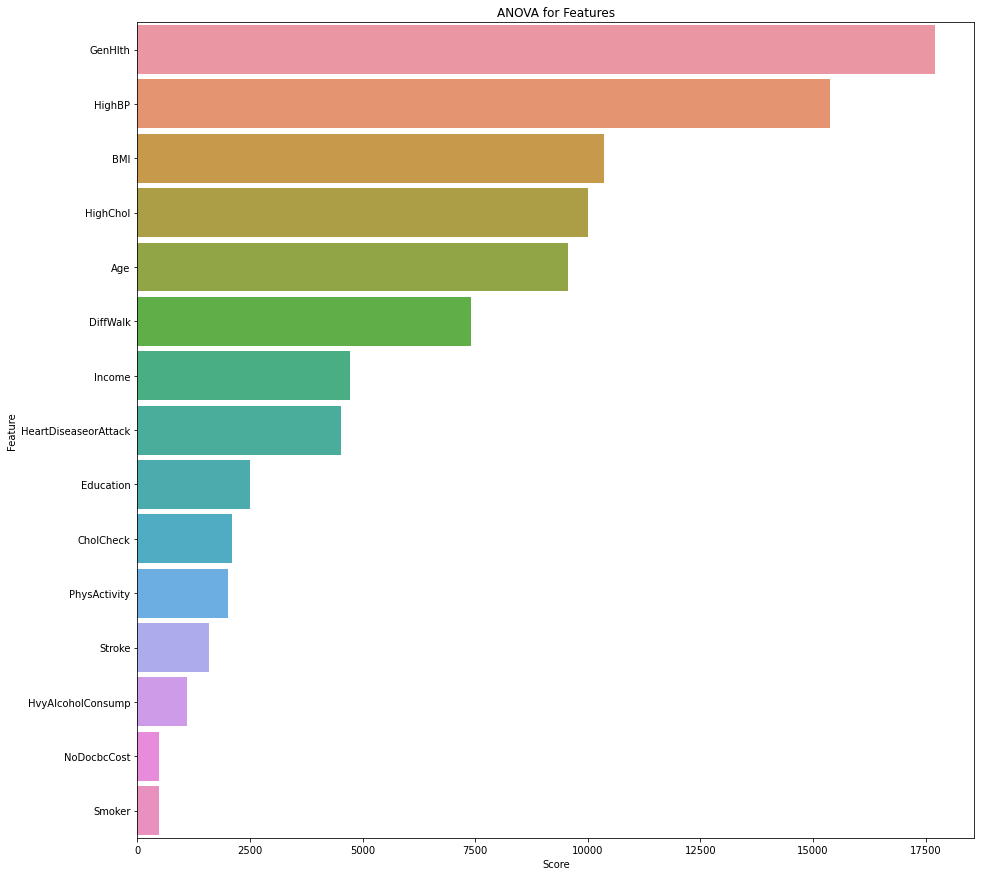

In [150]:
# Split data into input and outputs
X, y = df.iloc[:, 1:], df["Diabetes_012"]
XColumns = X.columns

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, order=f_classif)

# Print scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot the scores
plt.figure(figsize=(15,15))
sns.barplot(x=pd.Series([scr for scr in fs.scores_], name="Score"), y=pd.Series(XColumns, name="Feature"), orient="h", width=0.9).set(title='ANOVA for Features')